In [3]:
import os
import numpy as np
import pandas as pd
from nltk import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn.model_selection as model_selection
from sklearn.preprocessing import MinMaxScaler


mn = MinMaxScaler(feature_range=(-1, 1))
res = pd.read_csv("ExtractedData/Unified.csv")
res.fillna(res.median() ,inplace=True)
data = res.iloc[:, 1:-1].values
y = res.iloc[:, -1].values
# x_test = res.iloc[len(res)-1:, :]
# data = pd.DataFrame(data)
# res
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y,
                                                                            test_size=0.1,
                                                                            random_state=42,
                                                                            shuffle=True)
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(res)

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(label='')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

# 
# for name, model in models:
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [4]:
dataset = pd.read_csv("ExtractedData/compressed_data_no_name.csv")
# dataset.hist()

In [5]:
dataset.fillna(dataset.median() ,inplace=True)
bins = [0, 100000, 500000,1000000, 100000000, 250000000, 500000000, 1000000000, 10000000000]
labels = ["{0}-{1}".format(bins[i],bins[i+1]) for i in range(len(bins)-1)]   
X = dataset.iloc[:, 1:-1].values
y = pd.cut(dataset.iloc[:, 14], bins, labels=labels)
# y = dataset.iloc[:, 14]

In [13]:
most_Freq_avg = dataset['most Freq'].median() 
repetitive_avg =  dataset['repetitive'].median()
offensive_avg = dataset['offensive'].median()
spellScheck = dataset['spellScheck'].median()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = y_train

In [5]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
# classifier = LogisticRegression()
# classifier = RandomForestRegressor(n_estimators=100)
# classifier = RandomForestClassifier(n_estimators=100,
#                                     criterion='gini')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [8]:
y_pred = classifier.predict(X_test[:1])

print(classifier.score(X_test, y_test))
from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print(y_test - y_pred)

0.39285714285714285


In [2]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
np.dot(X, np.array([1, 2])) + 3

array([ 6,  8,  9, 11])

ValueError: fname must be a PathLike or file handle

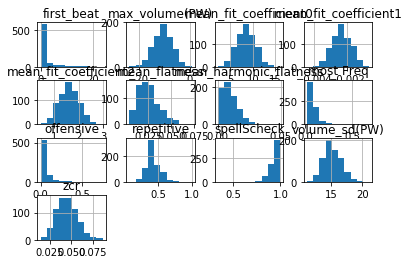

In [14]:
from matplotlib import pyplot as plt
X = dataset.iloc[:, 1:-1]
# axis,fig = plt.subplot()
plt.savefig(X.hist())